In [35]:
from google.colab import drive
drive.mount("./mount")

Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).


In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [52]:
generator = tf.keras.models.load_model('mount/My Drive/Colab Notebooks/digigo_data/gan_mountain/GAN_Mountain_Model_epoch_v1_150.h5')
PATH_hand = "mount/My Drive/Colab Notebooks/digigo_data/gan_mountain/hand"

EPOCHS = 100
BUFFER_SIZE = 14224
BATCH_SIZE = 1
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [43]:
def load(image_file):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_png(image, channels = 3)

    w = tf.shape(image)[1]

    # w = w // 2
    input_image = image[:, :, :]

    input_image = tf.cast(input_image, tf.float32)

    return input_image

In [44]:
def resize(input_image, height, width):
    input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)


    return input_image

def random_crop(input_image):
    stacked_image = tf.stack([input_image], axis=0)
    cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

    return cropped_image[0], cropped_image[1]

def normalize(input_image):
    input_image = (input_image / 127.5) - 1

    return input_image

@tf.function()
def random_jitter(input_image):
    input_image = resize(input_image, 256, 256)
    input_image = random_crop(input_image)

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)

    return input_image

In [53]:
def load_image_hand(image_file):
    input_image = load(image_file)
    input_image = resize(input_image, IMG_HEIGHT, IMG_WIDTH)
    input_image = normalize(input_image)

    return input_image
  
hand_dataset = tf.data.Dataset.list_files(PATH_hand+'*/*')
hand_dataset = hand_dataset.map(load_image_hand)
hand_dataset = hand_dataset.batch(BATCH_SIZE)

In [54]:
def generate_images(model, test_input):
    prediction = model(test_input, training=True)
    plt.figure(figsize=(15,15))

    display_list = [test_input[0], prediction[0]]
    title = ['Input Image', 'Predicted Image']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()

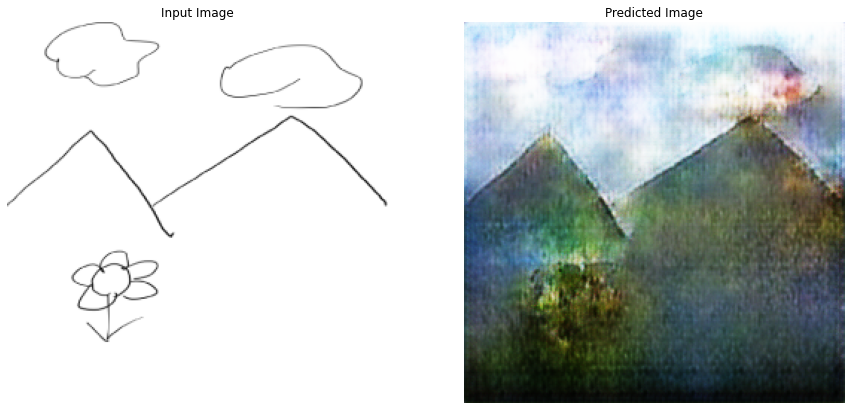

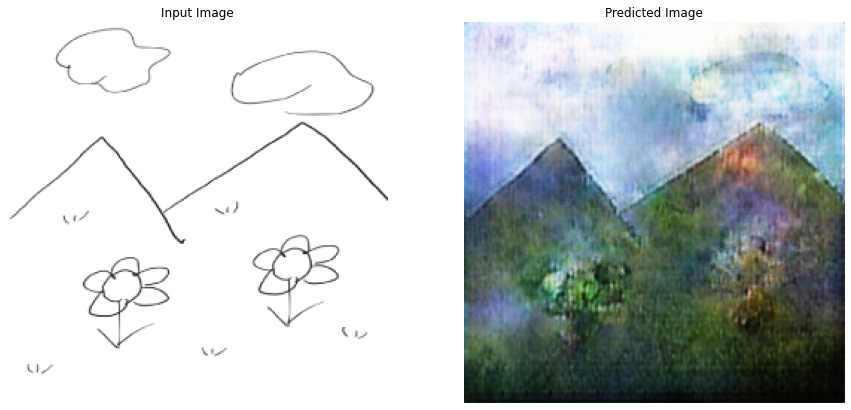

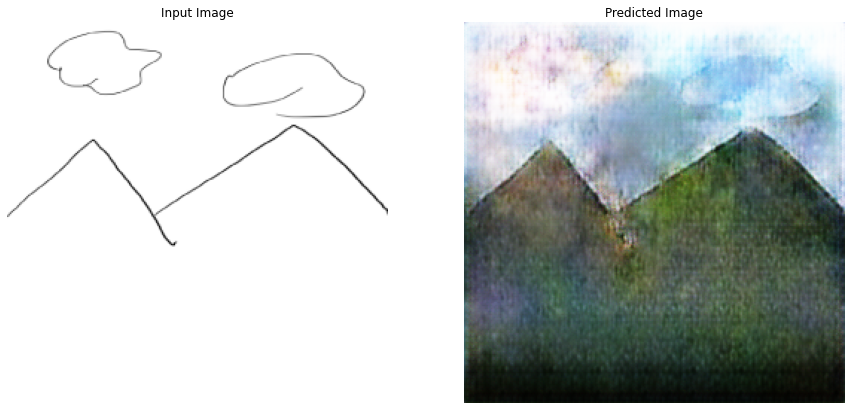

In [55]:
for example_input in  hand_dataset.take(3):
    generate_images(generator, example_input)

In [57]:
hand_dataset

<BatchDataset shapes: (None, 256, 256, 3), types: tf.float32>